In [1]:
import platform
import os
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 5  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 0.2  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'ip1_fe55_selftrig_3-12-25'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'hv_450'

det_single = 'inter_plein_1'

# file_nums = [0, 1, 2, 3, 4, 5]
file_nums = 'all'

noise_threshold_sigmas = 3

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [4]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

# det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=True)
det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=False)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_2': 450}
Detector center: [  9.2  38.4 712.7]
Detector active size: [127.125 127.      4.   ]
Reading in data...


100%|██████████| 5/5 [00:46<00:00,  9.20s/it]


Read in data shape: (130606, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  7.67it/s]


Fitting time: 2.3554513454437256 s
Processed sub-chunk 1/1
Processed chunk 1/2


100%|██████████| 4/4 [00:32<00:00,  8.10s/it]


Read in data shape: (72889, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


Fitting time: 1.7498500347137451 s
Processed sub-chunk 1/1
Processed chunk 2/2
Getting hits...
Hits shape: (203495, 256)


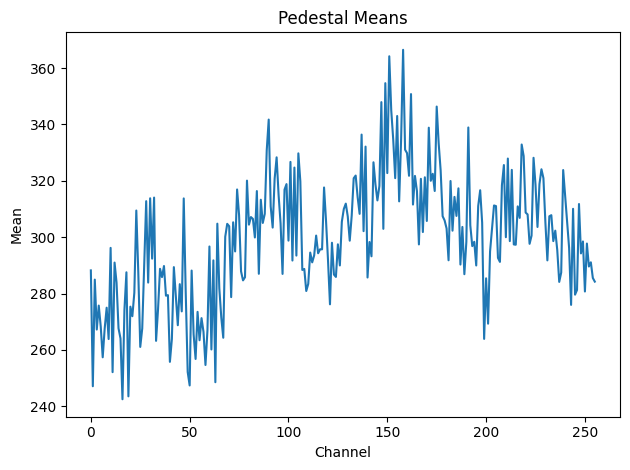

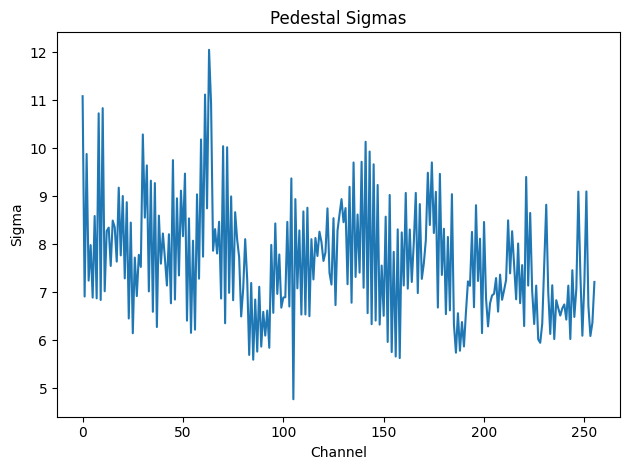

In [5]:
det.dream_data.plot_pedestals()

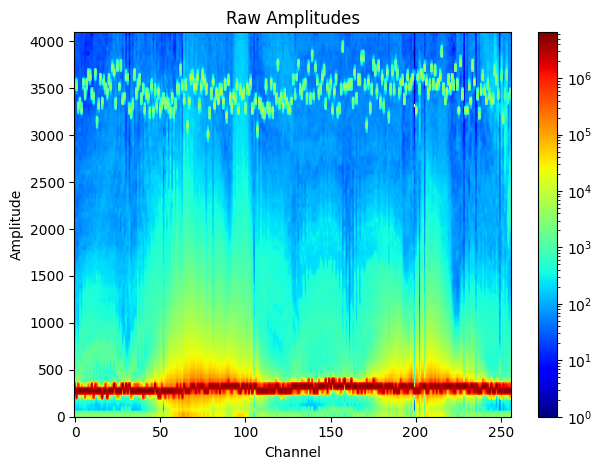

In [6]:
det.dream_data.plot_raw_amps_2d_hist()

In [7]:
# for event_num in range(min(len(det.dream_data.hits), 20)):
    # det.plot_event_1d(event_num)
    # det.plot_event_2d(event_num)
    # det.dream_data.plot_waveforms(event_num)

In [8]:
# det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: []
Connector 2 Dead Strips: []
Connector 3 Dead Strips: []
Connector 4 Dead Strips: []


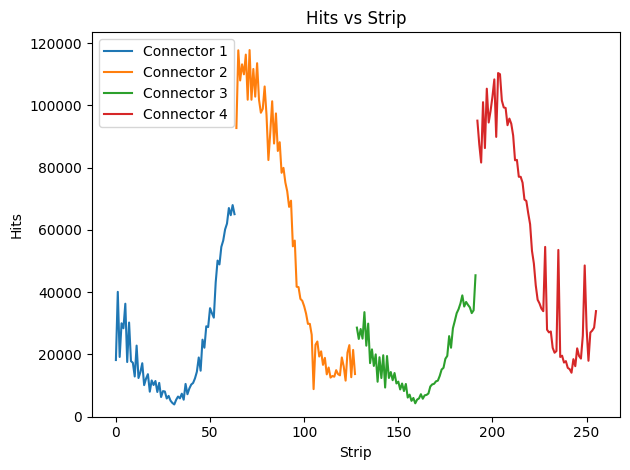

In [9]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

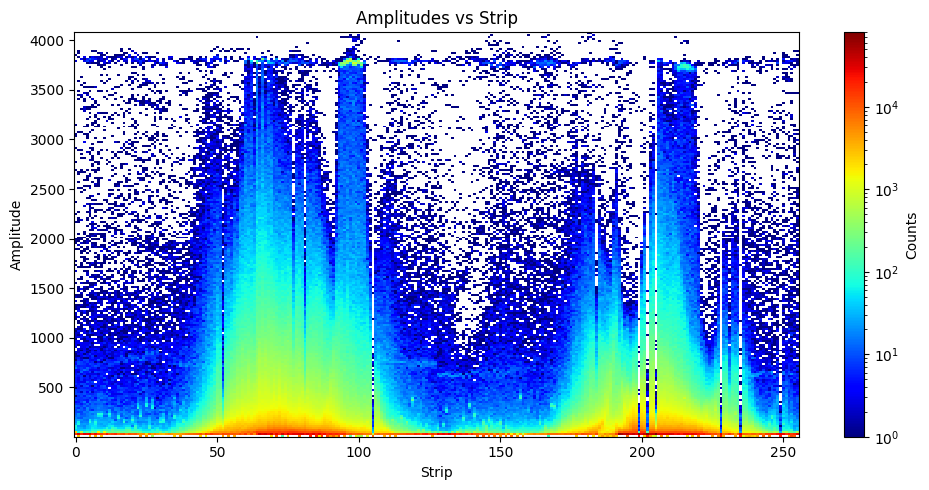

In [10]:
det.dream_data.plot_amplitudes_vs_strip()

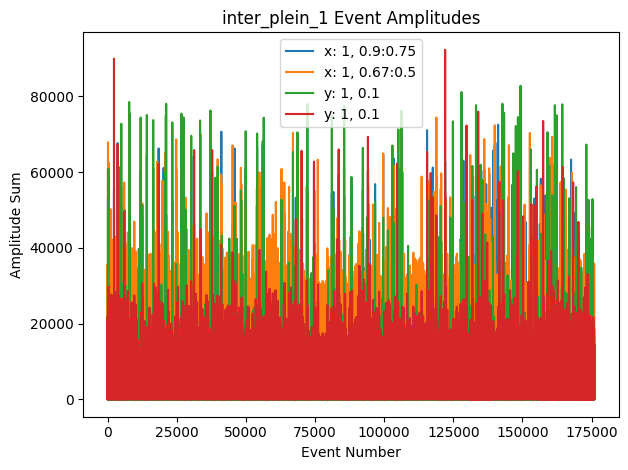

In [11]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

C:\Users\Dylan\PycharmProjects\saclay_micromegas\Detector_Classes\DreamDetector.py:659: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


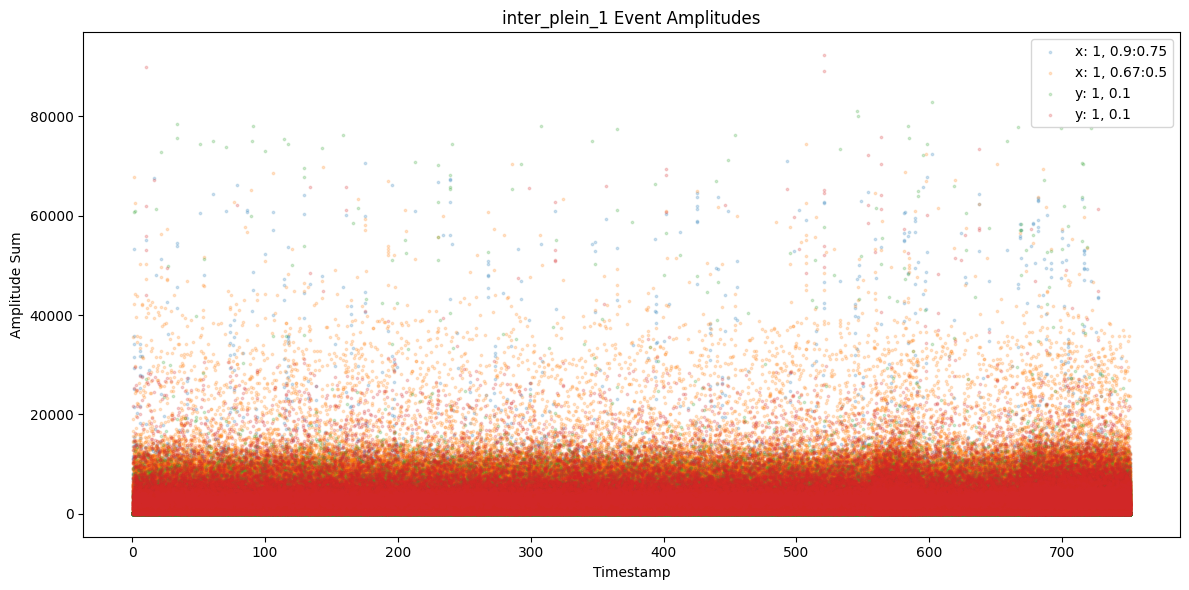

In [12]:
start_date_time = datetime(2025, 2, 27, 17, 25)
# det.plot_xy_amp_sum_vs_timestamp(x_range=(0, 2.7e13 / 1e8), t_start=start_date_time)
det.plot_xy_amp_sum_vs_timestamp()
# det.plot_xy_amp_sum_vs_timestamp(t_start=start_date_time)

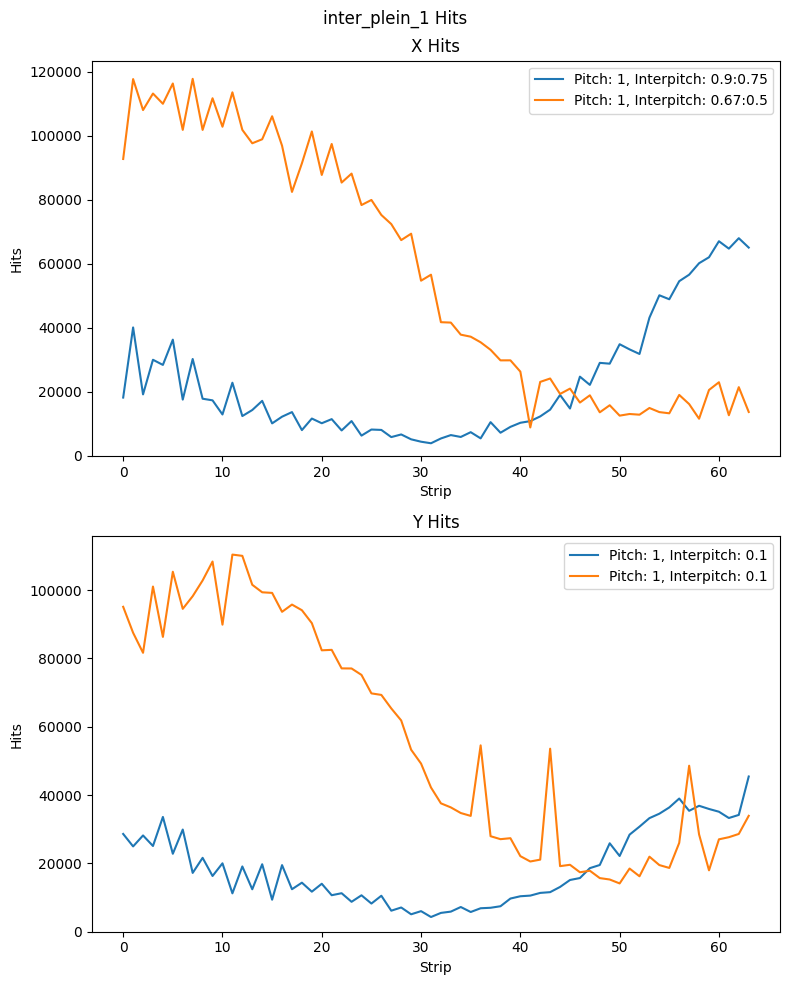

In [13]:
det.plot_hits_1d()

In [14]:
print(len(det.dream_data.hits))

203495


In [15]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

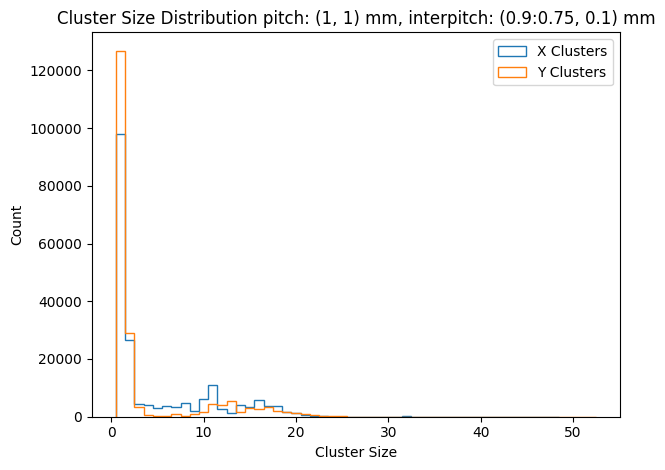

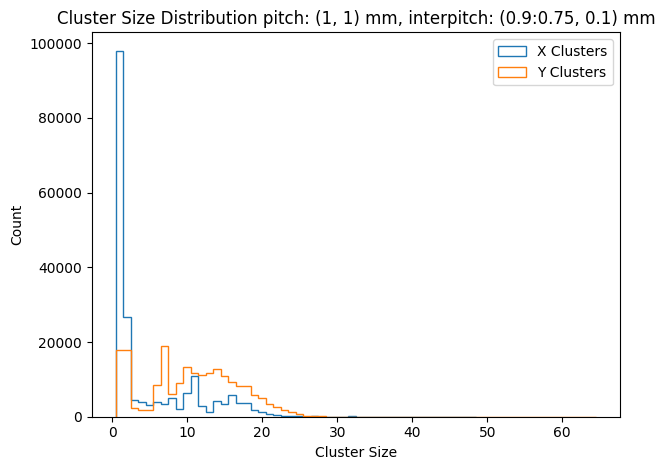

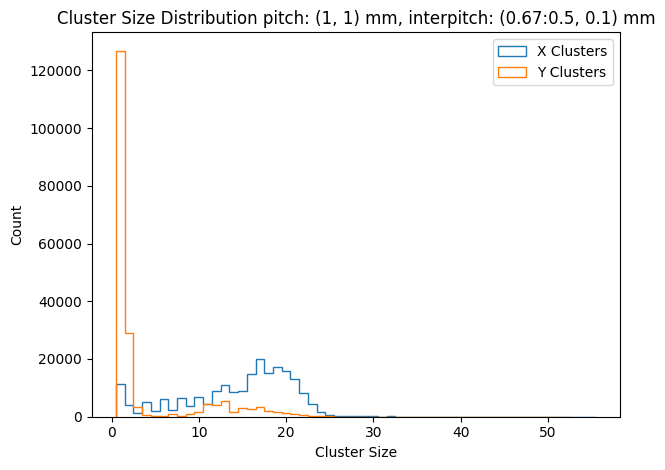

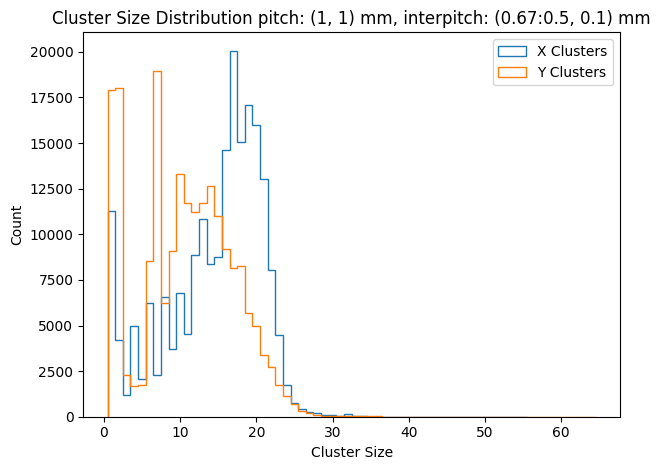

In [16]:
for sub_det in det.sub_detectors:
    sub_det.plot_cluster_sizes()

In [17]:
det.get_det_clusters()

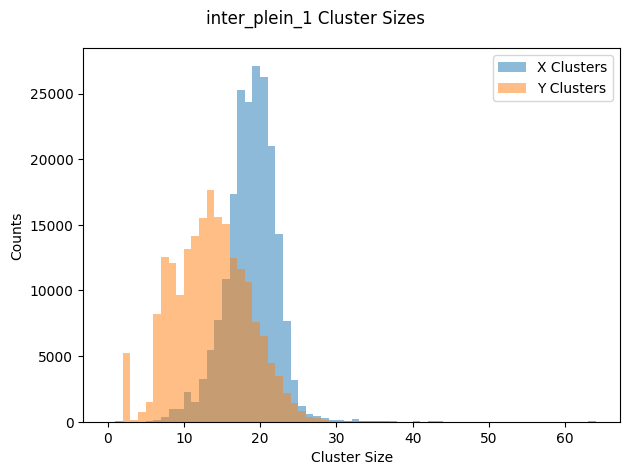

In [18]:
det.plot_cluster_sizes()

(203495,)


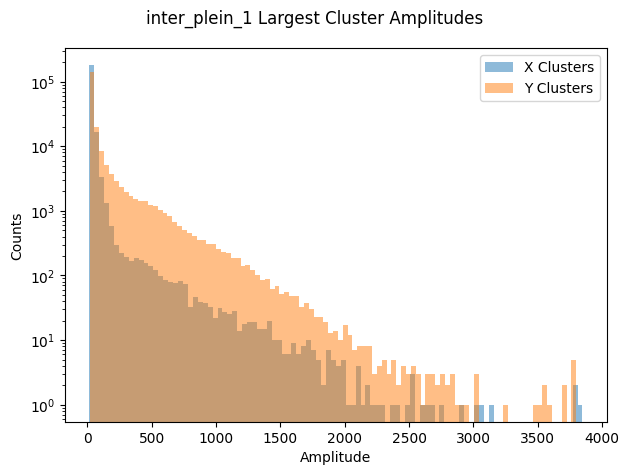

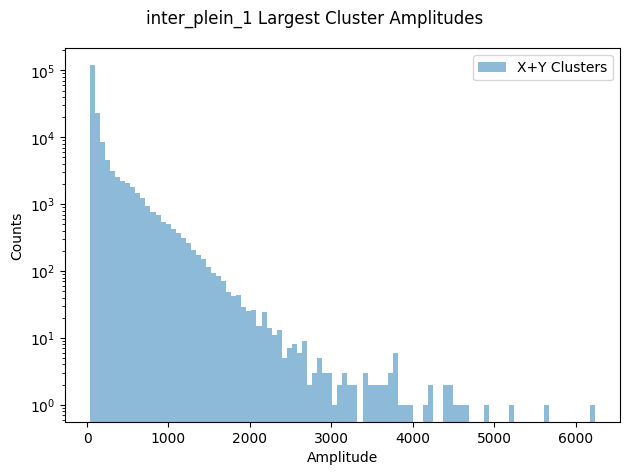

In [19]:
det.plot_cluster_amps()

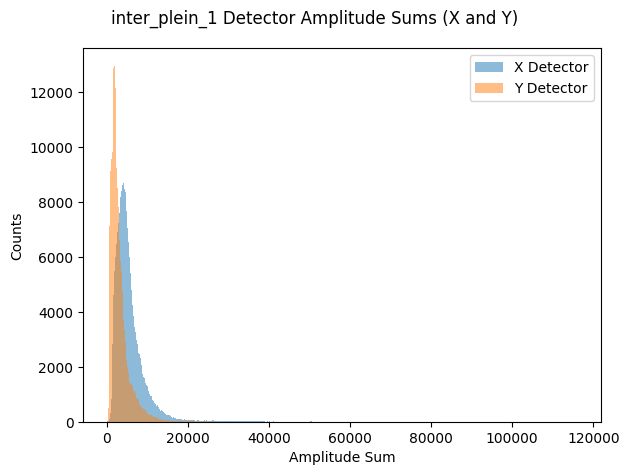

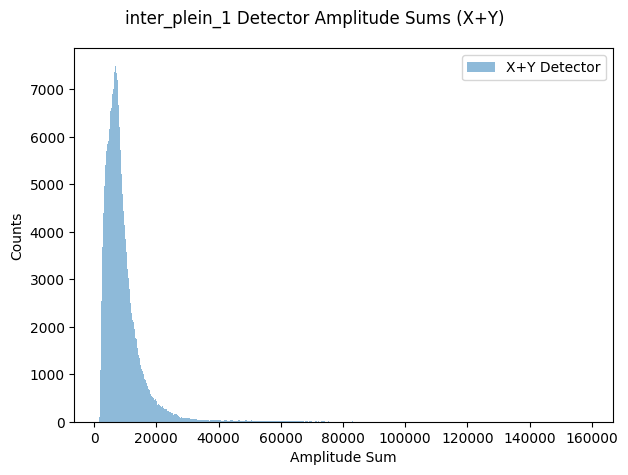

In [20]:
det.plot_det_amp_sums()

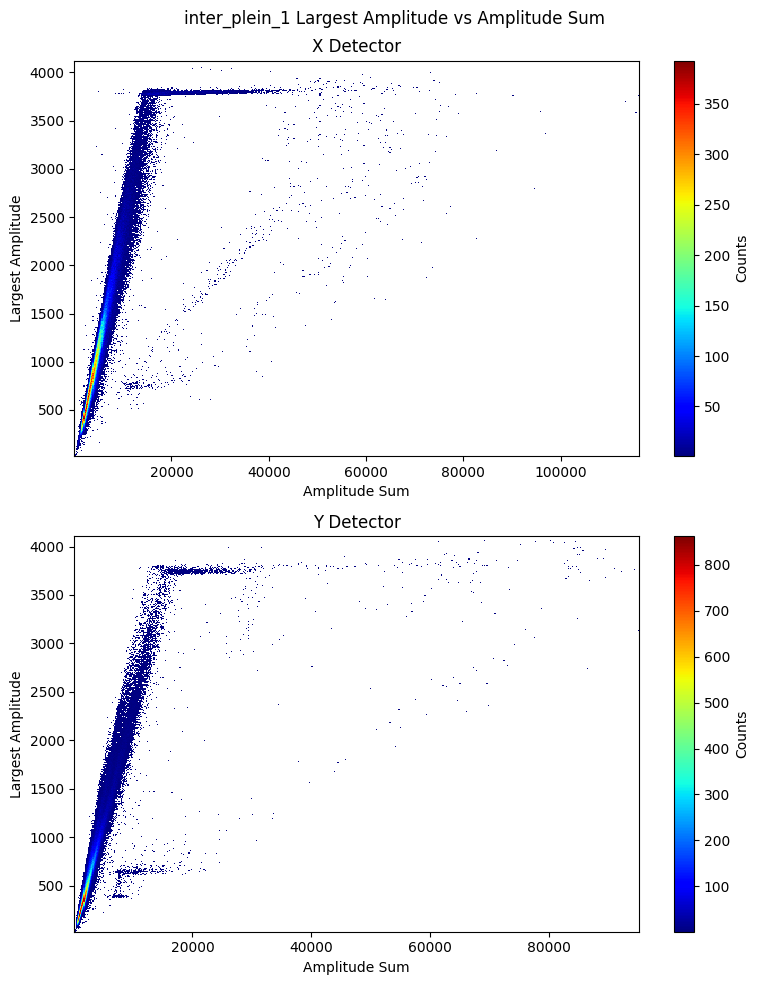

In [21]:
det.plot_det_largest_amp_vs_amp_sums(bins=500)

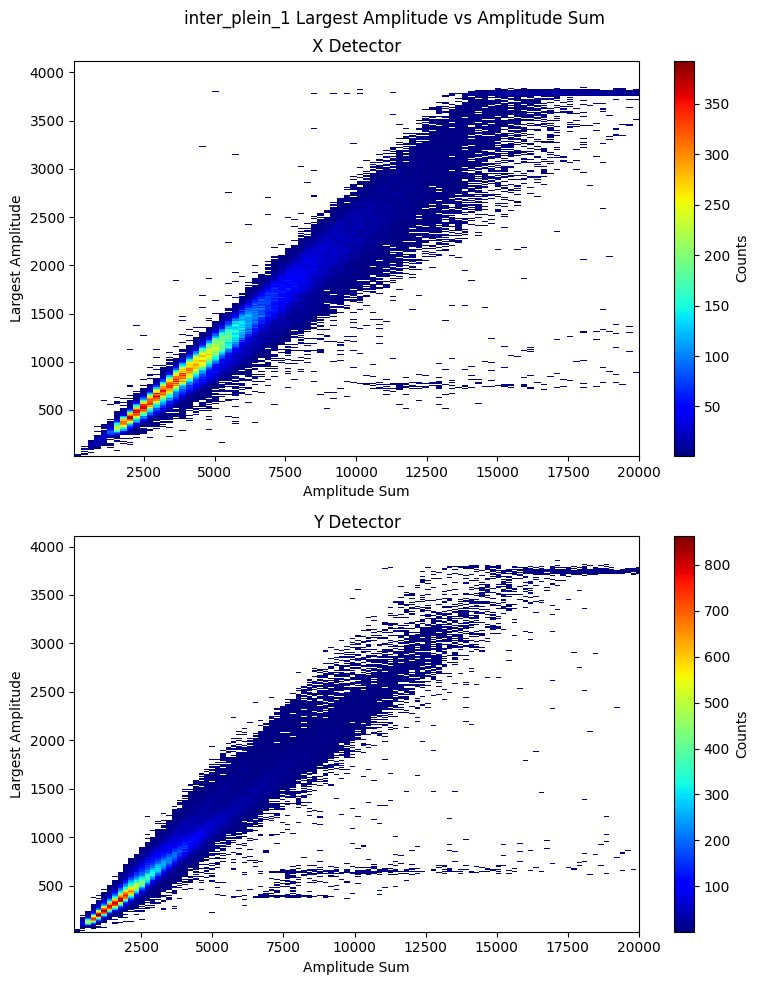

In [22]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, x_max=20000)

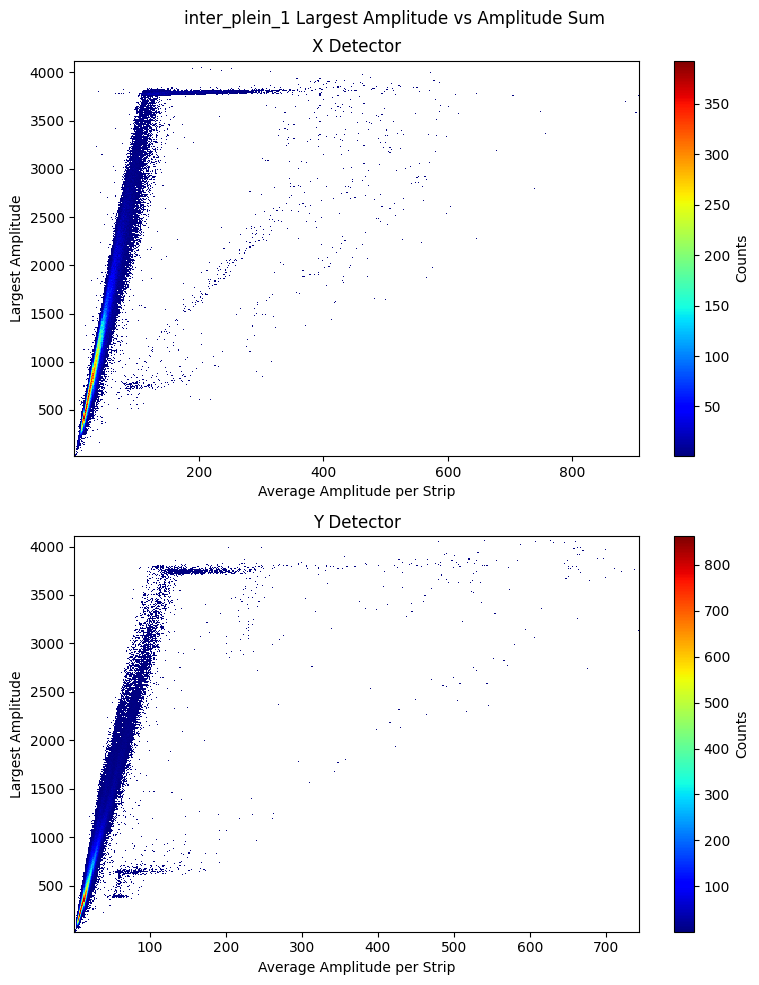

In [23]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, norm_per_strip=True)

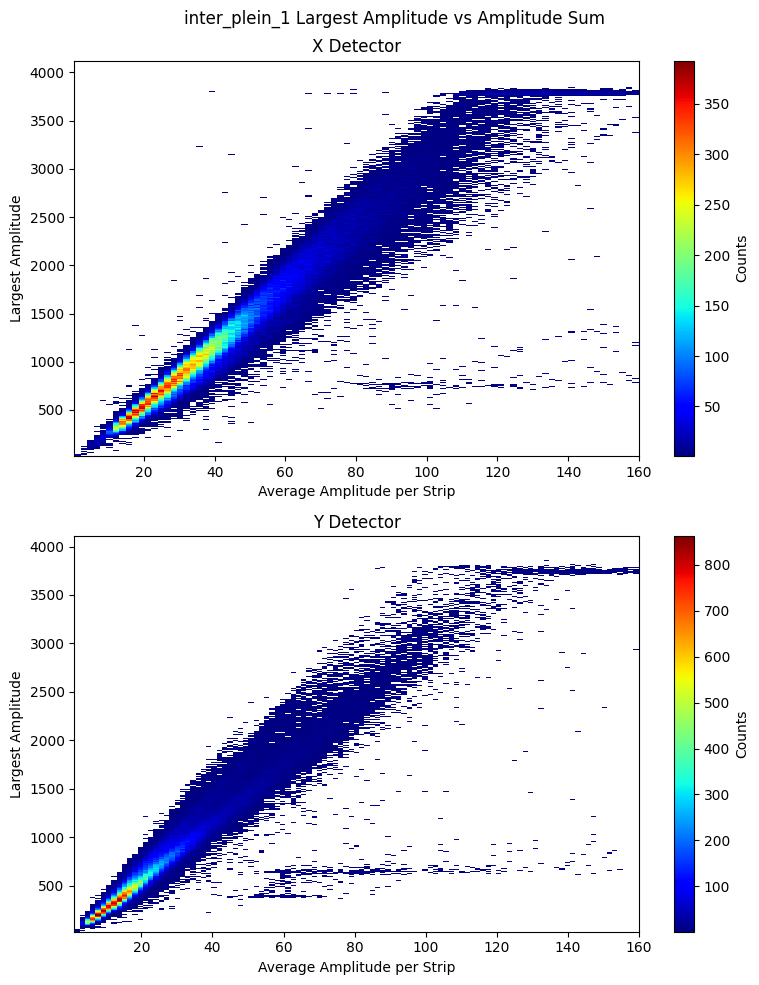

In [24]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, x_max=160, norm_per_strip=True)